## Classification (Iris dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.24.1
numpy   version = 1.15.4
seaborn version = 0.9.0


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,setosa
105,7.6,3.0,6.6,2.1,virginica
61,5.9,3.0,4.2,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
8,4.4,2.9,1.4,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
113,5.7,2.5,5.0,2.0,virginica
82,5.8,2.7,3.9,1.2,versicolor
134,6.1,2.6,5.6,1.4,virginica
95,5.7,3.0,4.2,1.2,versicolor


In [4]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

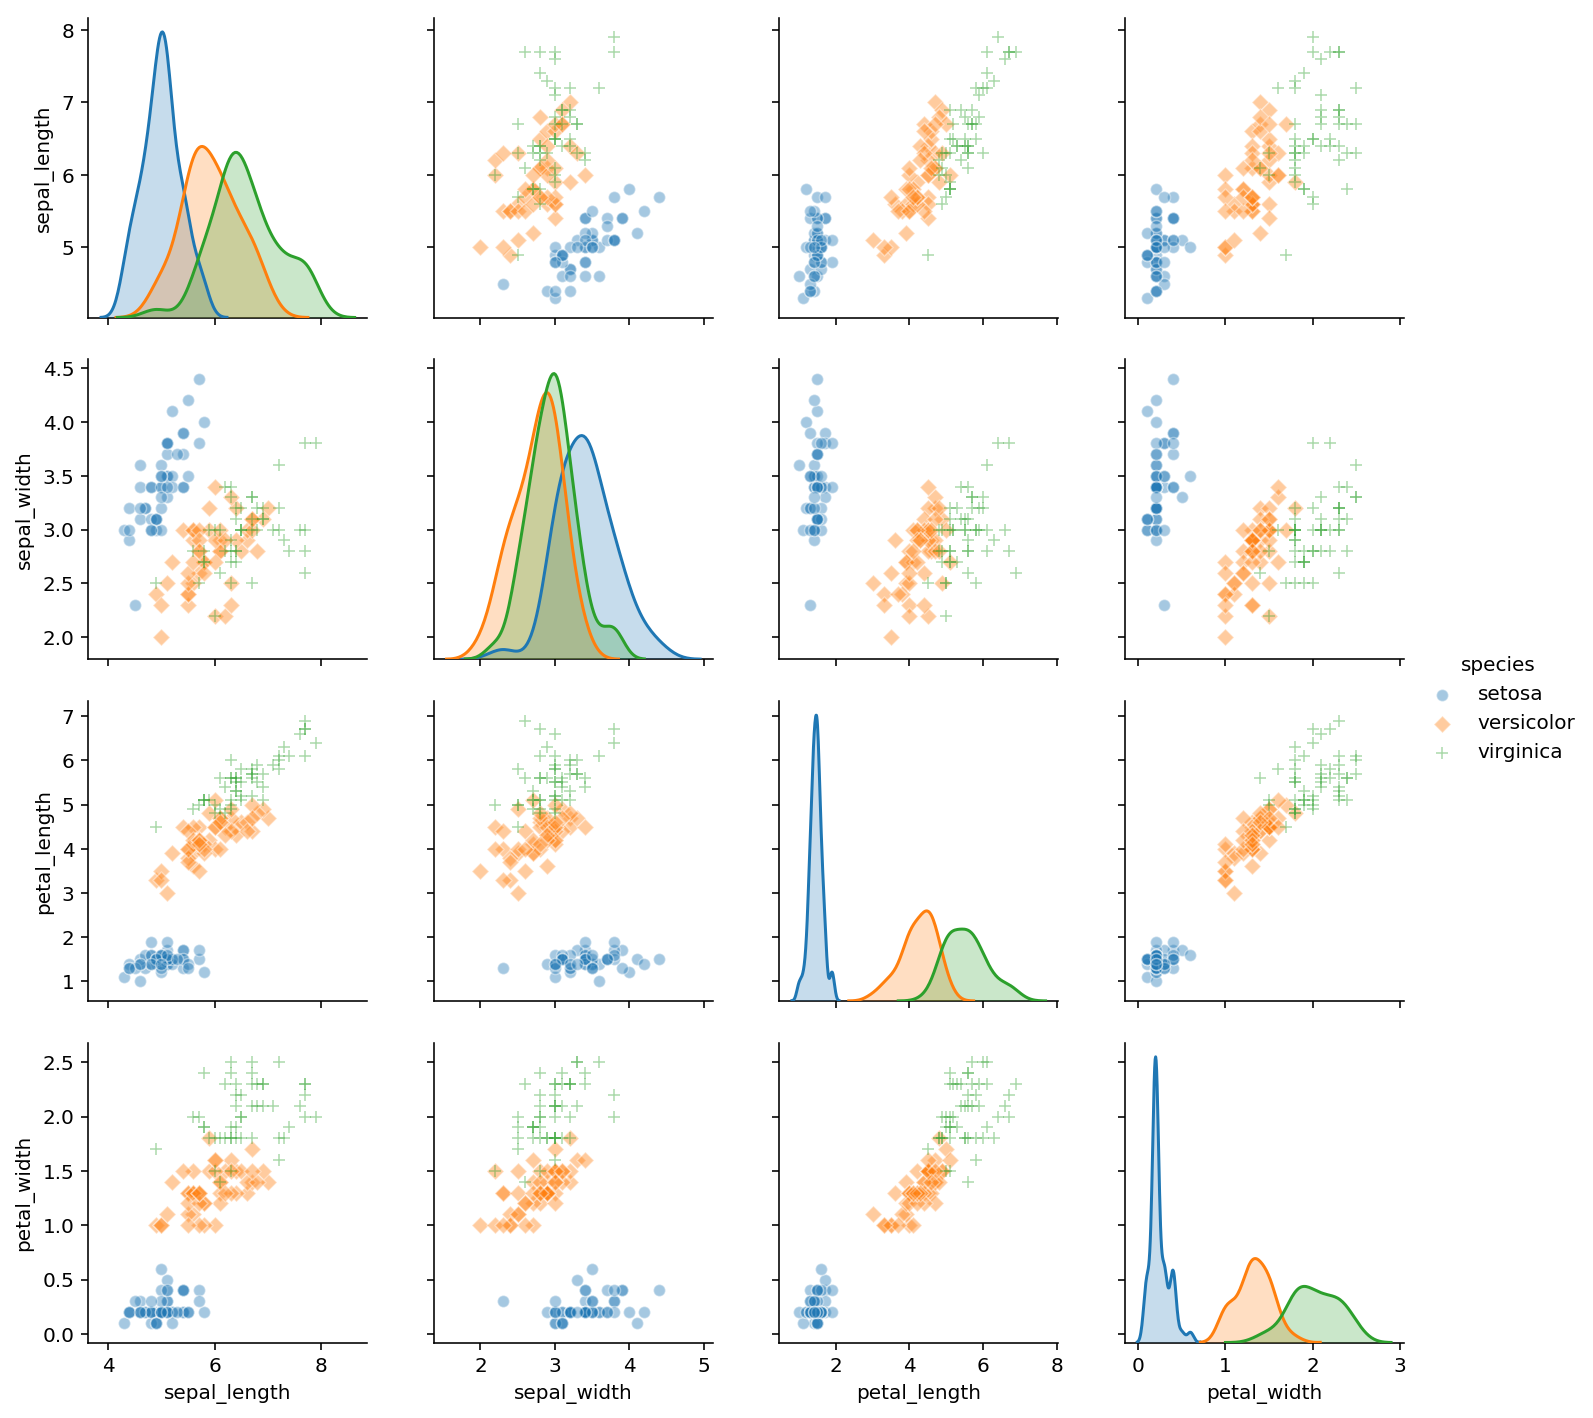

In [6]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
             markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Scikit-learn: KNeighborsClassifier

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y_train = df.species
# y_train = df.species_code

test_size=0
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [11]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [12]:
y_train

149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
41         setosa
52     versicolor
94     versicolor
11         setosa
51     versicolor
77     versicolor
85     versicolor
32         setosa
109     virginica
28         setosa
70     versicolor
108     virginica
137     virginica
46         setosa
37         setosa
82     versicolor
120     virginica
63     versicolor
119     virginica
129     virginica
138     virginica
97     versicolor
80     versicolor
101     virginica
140     virginica
          ...    
34         setosa
64     versicolor
61     versicolor
123     virginica
112     virginica
53     versicolor
133     virginica
24         setosa
56     versicolor
69     versicolor
44         setosa
19         setosa
6          setosa
55     versicolor
75     versicolor
0          setosa
135     virginica
127     virginica
68     versicolor
136     virginica
42         setosa
110     virginica
89     versicolor
72     versicolor
23        

In [13]:
X_test

,sepal_length,sepal_width,petal_length,petal_width


In [14]:
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
model.score(X_train, y_train)

0.9666666666666667

In [17]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
149,5.9,3.0,5.1,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
1,4.9,3.0,1.4,0.2,setosa
63,6.1,2.9,4.7,1.4,versicolor
12,4.8,3.0,1.4,0.1,setosa
73,6.1,2.8,4.7,1.2,versicolor
116,6.5,3.0,5.5,1.8,virginica
127,6.1,3.0,4.9,1.8,virginica
145,6.7,3.0,5.2,2.3,virginica


In [18]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [20]:
predicted = model.predict(X_train)
predicted

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virgi

In [21]:
dx=pd.DataFrame({'y_true': y_train, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
106,virginica,versicolor
70,versicolor,virginica
119,virginica,versicolor
83,versicolor,virginica
72,versicolor,virginica


## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

In [22]:
print(confusion_matrix(y_train, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [23]:
print(accuracy_score(y_train, predicted))

0.9666666666666667


In [24]:
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## Logistic Regression

In [25]:
model_b = LogisticRegression()
model_b

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
model_b.fit(X_train, y_train)

/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
predicted_b = model_b.predict(X_train)
predicted_b

array(['virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica

In [28]:
print(confusion_matrix(y_train, predicted_b))

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


In [29]:
print(accuracy_score(y_train, predicted_b))

0.96


In [30]:
print(classification_report(y_train, predicted_b))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.90      0.94        50
   virginica       0.91      0.98      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

